<a href="https://colab.research.google.com/github/edada2018/Big-Data-Analysis---Standard-CNN-and-Bagging-Learning-CNN/blob/main/Copy_of_ELEG_6318_Deep_Learning_GroupProject_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a Group Project with the goal to compare the performance generated with 3 different neural networks using CP + CP + CP structure different from the Homework and Class Practices**

** Christian Onyeke = CNN **
** Elizabeth Dada = SNN **
 ** Olaoluwa Adegboye = RNN **

# **Christian Onyeke = CNN**



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#import packages
from __future__ import print_function
import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
import time

In [ ]:
# setting hyper-parameters
batch_size = 64
num_classes = 2
epochs = 30

In [ ]:
# Load the datasets
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'x_train.npy'

In [ ]:
print("Shapes:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

In [ ]:
# Number of classes and class names
num_classes = len(np.unique(y_train))
class_names = ['No-Covid', 'Covid']  # Changed from dictionary to list
print(f"Number of classes: {num_classes}")
print(f"Class names: {class_names}")

In [ ]:
# Determine binary or multi-class classification
num_classes = len(np.unique(y_train))
is_binary = num_classes == 2
is_binary

In [ ]:
print(np.isnan(x_train).any())
print(np.isnan(x_test).any())

In [ ]:
# Exploratory Data Analysis (EDA) - Visualize a Random Training Image with Label
rcParams['figure.figsize'] = 1.5, 1.5
image_id = np.random.randint(0, len(x_train))
plt.imshow(x_train[image_id])
plt.axis('off')
fine_label = class_names[y_train[image_id].argmax()]
print(f"\nImage ID: {image_id}")
print(f"Sample: {fine_label.capitalize()}")
plt.show()

In [ ]:
# Visualize multiple sample images from the training set
plt.figure(figsize=(12, 8))
for i in range(14):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    #plt.title(f"Label: {class_names[y_train[i]]}")
    plt.title(f" {class_names[y_train[i]]}")
    plt.axis('off')
plt.show()

In [ ]:
# Normalize the input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# encode labels
if len(y_train.shape) == 1 or y_train.shape[1] == 1:
    num_classes = len(np.unique(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)


In [ ]:
# input shape and number of classes
input_shape = x_train.shape[1:]  # (height, width, channels)
num_classes = y_train.shape[1]

In [ ]:
# CNN Structure: Conv-Pool + Conv-Pool + Conv-Pool
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
# Set learning rate
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Train the model
start_train = time.time()
history_cnn = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    verbose=1)

end_train = time.time()

In [ ]:
training_time = end_train - start_train
print(f"\nTraining Time: {training_time:.2f} seconds")

In [ ]:
# Training Evaluation
start_train_eval = time.time()

y_pred_train = model.predict(x_train, verbose=0)

if y_pred_train.shape[-1] > 1:
    y_pred_train_labels = np.argmax(y_pred_train, axis=1)
    y_true_train_labels = np.argmax(y_train, axis=1)
else:
    y_pred_train_labels = (y_pred_train > 0.5).astype(int)
    y_true_train_labels = y_train

# Calculate training metrics
train_accuracy = accuracy_score(y_true_train_labels, y_pred_train_labels)
train_precision = precision_score(y_true_train_labels, y_pred_train_labels, average='weighted', zero_division=0)
train_recall = recall_score(y_true_train_labels, y_pred_train_labels, average='weighted', zero_division=0)
train_f1 = f1_score(y_true_train_labels, y_pred_train_labels, average='weighted', zero_division=0)

end_train_eval = time.time()
training_eval_time = end_train_eval - start_train_eval

In [ ]:
# Print training results
print("\n--- Training Metrics ---")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1-Score: {train_f1:.4f}")

In [ ]:
# Testing Evaluation
start_test = time.time()
y_pred_test = model.predict(x_test, verbose=0)

# Evaluate model loss and accuracy on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

end_test = time.time()
testing_eval_time = end_test - start_test

if y_pred_test.shape[-1] > 1:
    y_pred_test_labels = np.argmax(y_pred_test, axis=1)
    y_true_test_labels = np.argmax(y_test, axis=1)
else:
    y_pred_test_labels = (y_pred_test > 0.5).astype(int)
    y_true_test_labels = y_test

# Calculate testing metrics
test_precision = precision_score(y_true_test_labels, y_pred_test_labels, average='weighted', zero_division=0)
test_recall = recall_score(y_true_test_labels, y_pred_test_labels, average='weighted', zero_division=0)
test_f1 = f1_score(y_true_test_labels, y_pred_test_labels, average='weighted', zero_division=0)


In [ ]:
# Print testing results
print("\n--- Testing Metrics ---")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Testing Evaluation Time: {testing_eval_time:.2f} seconds")

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true_test_labels, y_pred_test_labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report

print("\nClassification Report:")
print(classification_report(y_true_test_labels, y_pred_test_labels, target_names=['No-Covid', 'Covid']))

In [ ]:
# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train acc')
plt.plot(history_cnn.history['val_accuracy'], label='Val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train loss')
plt.plot(history_cnn.history['val_loss'], label='Val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
#plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Image Classification
y_pred = model.predict(x_test)

if y_pred.shape[-1] > 1:
    y_pred_classes = np.argmax(y_pred, axis=1)
else:
    y_pred_classes = (y_pred > 0.5).astype(int).flatten()


In [ ]:
# Display Predicted samples
label_map = {0: "No-Covid", 1: "Covid"}

plt.figure(figsize=(15, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    image = x_test[i]

    # Contrast stretch
    img_min = image.min()
    img_max = image.max()
    img_display = (image - img_min) / (img_max - img_min + 1e-8)

    if image.shape[-1] == 1:
        plt.imshow(img_display.squeeze(), cmap='gray')
    elif image.shape[-1] == 3:
        plt.imshow(img_display)
    else:
        plt.imshow(img_display, cmap='gray')

    true_label = np.argmax(y_test[i])
    pred_label = y_pred_classes[i]

    # Use label_map for readable names
    true_name = label_map.get(true_label, true_label)
    pred_name = label_map.get(pred_label, pred_label)

    plt.title(f"True: {true_name}\nPred: {pred_name}", fontsize=9)
    plt.axis('off')

plt.suptitle("Sample Predictions (Covid vs No-Covid)", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Summary
model.summary()

In [ ]:
# Plot model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True)

# **Elizabeth Dada**

# **Standard Neural Network**

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

In [ ]:
# # 1. Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# 2. Change Directory
# import os
# os.chdir("/content/drive/MyDrive/DeepLearning_TeamProject")
# !ls  # confirm that your .npy files are present

In [ ]:
# Load the datasets
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [ ]:
# Split into train/validation
x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# Standard NN Model architecture
def build_model():
    model = Sequential([
        Flatten(input_shape=x_train.shape[1:]),
        Dense(256, activation='relu'),
        Dropout(0.6),
        Dense(128, activation='relu'),
        Dropout(0.6),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=RMSprop(learning_rate=0.0001),
        metrics=['accuracy']
    )

    model.summary()

    return model


In [ ]:
import time
# Measure training time
start_time = time.time()

# Model
model_full = build_model()
history_full = model_full.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val),
    verbose=1
)

end_time = time.time()
training_time = end_time - start_time
print(f"\nTotal Training Time: {training_time:.2f} seconds")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    38,535,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,568,578 (147.13 MB)

 Trainable params: 38,568,578 (147.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 636ms/step - accuracy: 0.6439 - loss: 6.3355 - val_accuracy: 0.8333 - val_loss: 3.7766
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7610 - loss: 4.8513 - val_accuracy: 0.8333 - val_loss: 0.4215
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7188 - loss: 3.5116 - val_accuracy: 0.8167 - val_loss: 0.2287
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7585 - loss: 1.6531 - val_accuracy: 0.8333 - val_loss: 0.6837
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8290 - loss: 0.5541 - val_accuracy: 0.8333 - val_loss: 0.7279
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8250 - loss: 0.5519 - val_accuracy: 0.8500 - val_loss: 0.1927
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8057 - loss: 0.3827 - val_accuracy: 0.9500 - val_loss: 0.2057
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7706 - loss: 0.6796 - val_accuracy: 0.8333 - val_loss: 0.2434

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_model(model, x_train, y_train, x_test, y_test, label=""):
    # Testing time
    test_start_time = time.time()

    # Training predictions
    train_pred = np.argmax(model.predict(x_train), axis=1)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(
        y_train, train_pred, average='weighted')

    # Testing predictions
    test_pred = np.argmax(model.predict(x_test), axis=1)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(
        y_test, test_pred, average='weighted')

    test_end_time = time.time()
    testing_time = test_end_time - test_start_time

    # Output
    print(f"\nResults for {label}")
    print(f"Training - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1-score: {train_f1:.4f}")
    print(f"Testing  - Accuracy: {test_accuracy:.4f}, Loss: {test_loss:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-score: {test_f1:.4f}")
    print(f"Testing Time: {testing_time:.2f} seconds")

# Evaluate models
evaluate_model(model_full, x_train_new, y_train_new, x_test, y_test, label="Standard NN (Full Training)")


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step

Results for Standard NN (Full Training)
Training - Accuracy: 0.8333, Precision: 0.6944, Recall: 0.8333, F1-score: 0.7576
Testing  - Accuracy: 0.8400, Loss: 0.2365, Precision: 0.7056, Recall: 0.8400, F1-score: 0.7670
Testing Time: 1.99 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


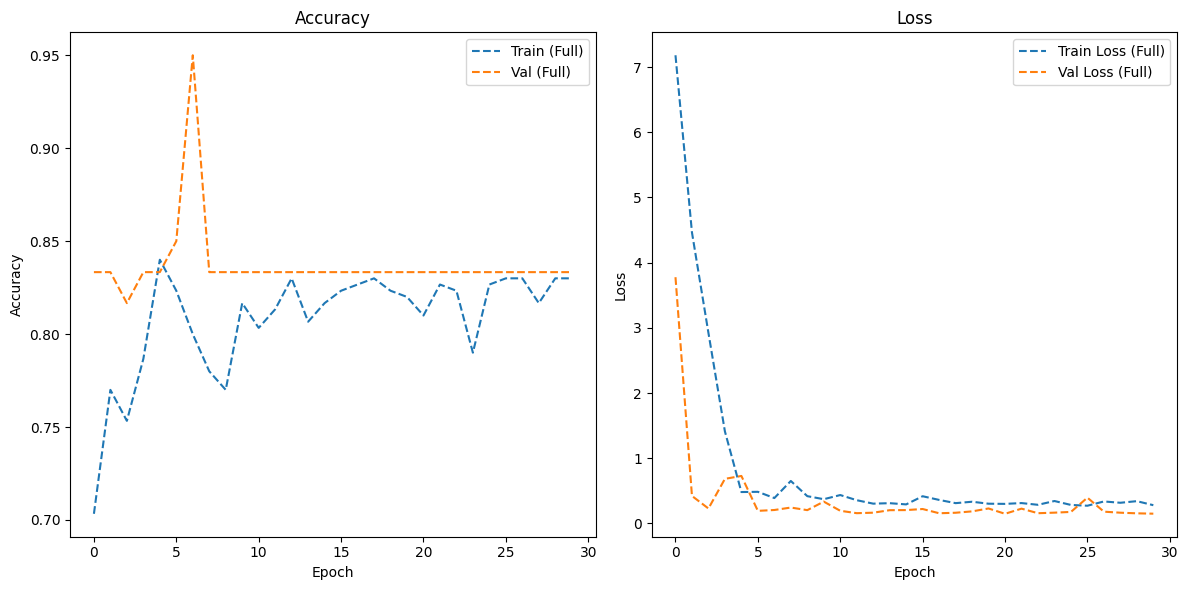

In [ ]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_full.history['accuracy'], '--', label='Train (Full)')
plt.plot(history_full.history['val_accuracy'], '--', label='Val (Full)')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_full.history['loss'], '--', label='Train Loss (Full)')
plt.plot(history_full.history['val_loss'], '--', label='Val Loss (Full)')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
#plt.grid(True)

plt.tight_layout()
plt.show()


# **Adegboye Olaoluwa**
# **Recurrent Neural Network**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import class_weight

print(tf.__version__)

2.18.0


In [ ]:
# ==============================
# Block 2: Load and Preprocess Dataset
# ==============================
# Load data
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

# Normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Ensure channel dimension
if len(x_train.shape) == 3:
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)

# Print dataset shapes
print('Training set shape:', x_train.shape)
print('Testing set shape:', x_test.shape)


Training set shape: (300, 224, 224, 3)
Testing set shape: (50, 224, 224, 3)



Class distribution in Training set:
0    250
1     50
Name: count, dtype: int64

Class distribution in Testing set:
0    42
1     8
Name: count, dtype: int64


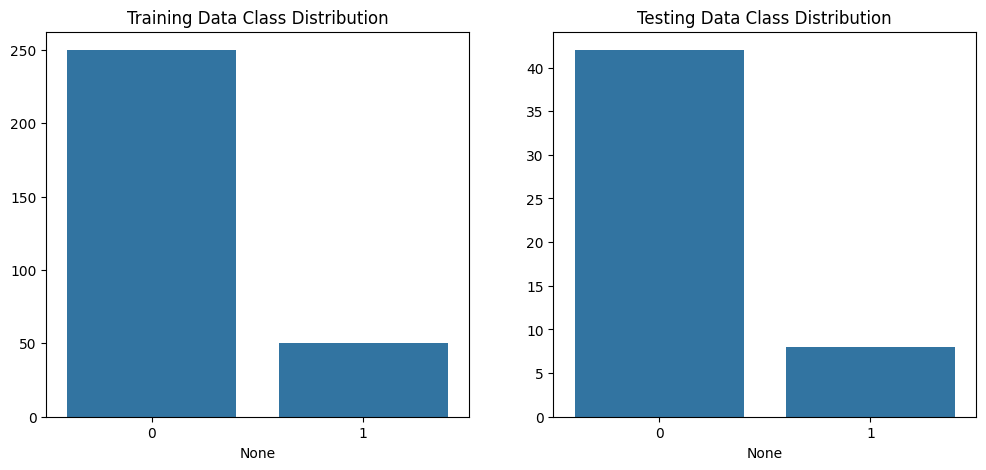

In [ ]:
# ==============================
# Block 3: Check and Display Class Distribution
# ==============================
print("\nClass distribution in Training set:")
train_counts = pd.Series(y_train).value_counts().sort_index()
print(train_counts)

print("\nClass distribution in Testing set:")
test_counts = pd.Series(y_test).value_counts().sort_index()
print(test_counts)

fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(x=train_counts.index, y=train_counts.values, ax=axs[0])
axs[0].set_title('Training Data Class Distribution')
sns.barplot(x=test_counts.index, y=test_counts.values, ax=axs[1])
axs[1].set_title('Testing Data Class Distribution')
plt.show()


In [ ]:
# ==============================
# Block 4: Define Focal Loss Function
# ==============================
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        y_true = tf.cast(y_true, tf.float32)
        cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        weight = alpha * tf.pow(1 - y_pred, gamma) * y_true + (1 - alpha) * tf.pow(y_pred, gamma) * (1 - y_true)
        loss = weight * cross_entropy
        return tf.reduce_mean(loss)
    return focal_loss_fixed


In [ ]:
# ==============================
# Block 5: Define BiLSTM Model
# ==============================
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((224, 224*3), input_shape=(224, 224, 3)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 224, 672)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 224, 256)       │       820,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,001,217 (3.82 MB)

 Trainable params: 1,001,217 (3.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ==============================
# Block 6: Compile Model
# ==============================
model.compile(optimizer='adam',
              loss=focal_loss(),
              metrics=['accuracy'])


In [ ]:
# ==============================
# Block 7: Compute Class Weights
# ==============================
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(weights))
print("\nClass Weights:", class_weights)



Class Weights: {0: np.float64(0.6), 1: np.float64(3.0)}


In [ ]:
import time
start_train_time = time.time()
# ==============================
# Block 8: Train BiLSTM Model
# ==============================
start_time = time.time()
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    class_weight=class_weights,
    verbose=1
)
training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds.")
end_train_time = time.time()
print(f'Training Time: {end_train_time - start_train_time:.2f} seconds')

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 235ms/step - accuracy: 0.6479 - loss: 0.1051 - val_accuracy: 0.8400 - val_loss: 0.0571
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8442 - loss: 0.0531 - val_accuracy: 0.8400 - val_loss: 0.0395
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8288 - loss: 0.0457 - val_accuracy: 0.8400 - val_loss: 0.0450
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8264 - loss: 0.0471 - val_accuracy: 0.8400 - val_loss: 0.0394
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.8336 - loss: 0.0452 - val_accuracy: 0.8400 - val_loss: 0.0393
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.8253 - loss: 0.0458 - val_accuracy: 0.8400 - val_loss: 0.0403
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8312 - loss: 0.0451 - val_accuracy: 0.8400 - val_loss: 0.0393
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8416 - loss: 0.0419 - val_accuracy: 0.8400 - val_loss: 0.0380

In [ ]:
# ==============================
# Block 9: Save Model
# ==============================
model.save('bilstm_covid_model_v2.h5')
print("Model saved as bilstm_covid_model_v2.h5")

Model saved as bilstm_covid_model_v2.h5


In [ ]:
start_test_time = time.time()
# ==============================
# Block 10: Evaluate Model (Threshold 0.5)
# ==============================
y_probs_train = model.predict(x_train)
y_pred_train = (y_probs_train > 0.5).astype("int32")
y_probs_test = model.predict(x_test)
y_pred_test = (y_probs_test > 0.5).astype("int32")

metrics = {
    'Train Accuracy': accuracy_score(y_train, y_pred_train),
    'Train Precision': precision_score(y_train, y_pred_train, zero_division=0),
    'Train Recall': recall_score(y_train, y_pred_train, zero_division=0),
    'Train F1-score': f1_score(y_train, y_pred_train, zero_division=0),
    'Test Accuracy': accuracy_score(y_test, y_pred_test),
    'Test Precision': precision_score(y_test, y_pred_test, zero_division=0),
    'Test Recall': recall_score(y_test, y_pred_test, zero_division=0),
    'Test F1-score': f1_score(y_test, y_pred_test, zero_division=0),
    'Test Loss': test_loss
}

df_metrics = pd.DataFrame([metrics])
print("\nBiLSTM Model Performance:\n")
print(df_metrics.to_string(index=False))
end_test_time = time.time()
print(f'Testing Time: {end_test_time - start_test_time:.2f} seconds')

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

BiLSTM Model Performance:

 Train Accuracy  Train Precision  Train Recall  Train F1-score  Test Accuracy  Test Precision  Test Recall  Test F1-score  Test Loss
       0.936667         0.897436           0.7        0.786517           0.88             0.6         0.75       0.666667   0.236486
Testing Time: 1.84 seconds


Learning curves saved as bilstm_covid_learning_curves_v2.png


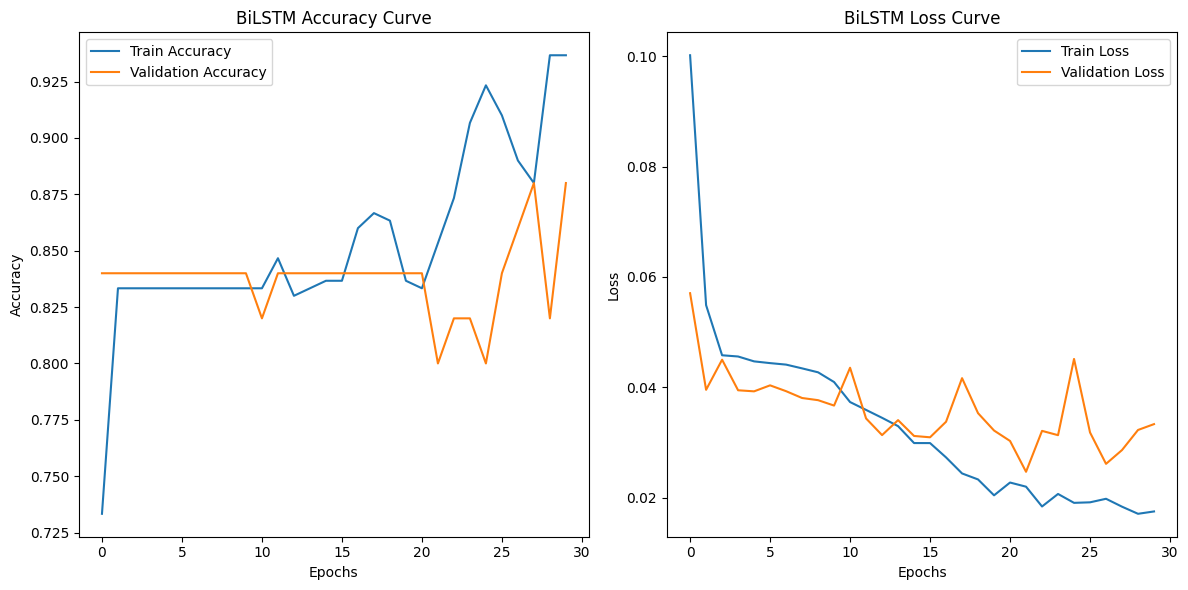

In [ ]:
# ==============================
# Block 11: Plot Training and Validation Curves
# ==============================
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Accuracy
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('BiLSTM Accuracy Curve')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
#ax[0].grid(True)


# Loss
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('BiLSTM Loss Curve')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()
#ax[1].grid(True)

plt.tight_layout()
fig.savefig('bilstm_covid_learning_curves_v2.png')
print("Learning curves saved as bilstm_covid_learning_curves_v2.png")
plt.show()

Confusion matrix saved as bilstm_covid_confusion_matrix_v2.png


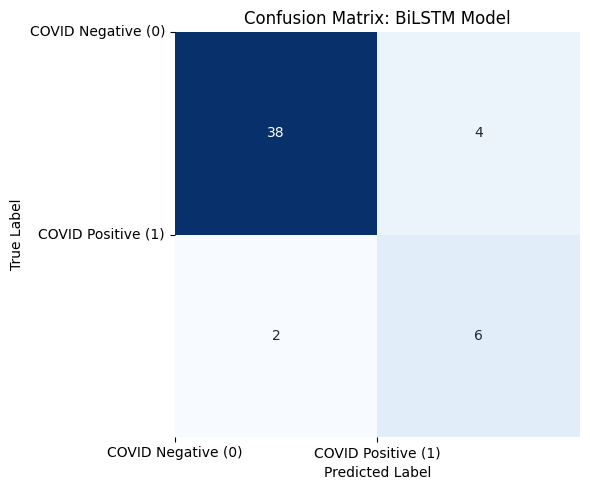

In [ ]:
# ==============================
# Block 12: Plot Confusion Matrix
# ==============================
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: BiLSTM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0,1], labels=['COVID Negative (0)', 'COVID Positive (1)'])
plt.yticks(ticks=[0,1], labels=['COVID Negative (0)', 'COVID Positive (1)'], rotation=0)
plt.tight_layout()
plt.savefig('bilstm_covid_confusion_matrix_v2.png')
print("Confusion matrix saved as bilstm_covid_confusion_matrix_v2.png")
plt.show()


# **Model Comparison**
# Table to show the comparison between these three NNs on Precision, Recall, F1-score, Accuracy, and total training time (seconds) based on the training

In [ ]:
# Define the training results data
data = {
    'Model': ['CNN', 'Standard NN', 'RNN (BiLSTM)'],
    'Accuracy': [0.9467, 0.8333, 0.9367],
    'Precision': [0.9535, 0.6944, 0.8974],
    'Recall': [0.9467, 0.8333, 0.7000],
    'F1-Score': [0.9485, 0.7576, 0.7865],
    'Train Time (s)': [40.74, 14.57, 32.15]
}

# Create a DataFrame
training_df = pd.DataFrame(data)

# Set 'Model' as index for better formatting
training_df.set_index('Model', inplace=True)

# Display the DataFrame
print("\nTraining Results Comparison Table (Ordered Columns):")
print(training_df)


Comparison Table based on Training Results:
              Precision  Recall  F1-Score  Accuracy  Training Time (s)
Model                                                                 
CNN              0.9535  0.9467    0.9485    0.9467              40.74
Standard NN      0.6944  0.8333    0.7576    0.8333              14.57
RNN (BiLSTM)     0.8974  0.7000    0.7865    0.9367              32.15


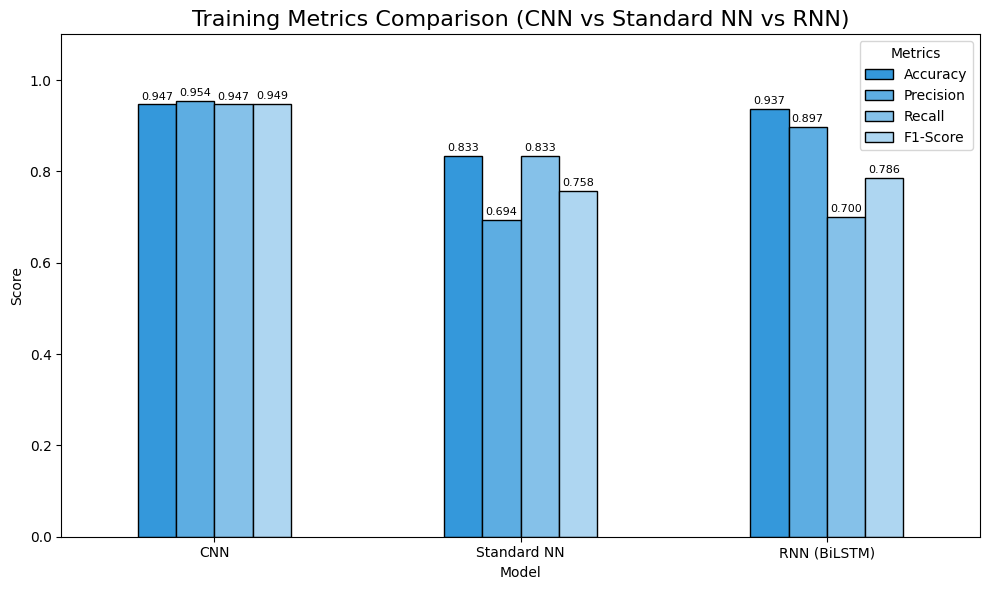

In [ ]:
# Bar chart comparison
training_data = {
    'Model': ['CNN', 'Standard NN', 'RNN (BiLSTM)'],
    'Accuracy': [0.9467, 0.8333, 0.9367],
    'Precision': [0.9535, 0.6944, 0.8974],
    'Recall': [0.9467, 0.8333, 0.7000],
    'F1-Score': [0.9485, 0.7576, 0.7865],
}

# Create DataFrame
training_df = pd.DataFrame(training_data)
training_df.set_index('Model', inplace=True)

cool_colors = ['#3498db', '#5dade2', '#85c1e9', '#aed6f1']  # Shades of blue

# Plotting
ax = training_df.plot(
    kind='bar',
    figsize=(10,6),
    color=cool_colors,
    edgecolor='black'
)

# Title and labels
plt.title('Training Metrics Comparison (CNN vs Standard NN vs RNN)', fontsize=16)
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(title='Metrics')

ax.grid(False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=2)

# Tight layout
plt.tight_layout()
plt.show()

# Table to show the comparison between these three NNs on Precision, Recall, F1-score, Accuracy, and total training time (seconds) based on the testing

In [ ]:
# Define the testing results
data = {
    'Model': ['CNN', 'Standard NN', 'RNN (BiLSTM)'],
    'Accuracy': [0.9000, 0.8400, 0.8800],
    'Loss': [0.2365, 0.2365, 0.2364],
    'Precision': [0.9385, 0.7056, 0.6000],
    'Recall': [0.9000, 0.8400, 0.7500],
    'F1-Score': [0.9087, 0.7670, 0.6667],
    'Test Time (s)': [1.72, 1.99, 1.63]
}

# Create a DataFrame
testing_df = pd.DataFrame(data)

# Set 'Model' as index for better formatting
testing_df.set_index('Model', inplace=True)

# Display the DataFrame
print("\nTesting Results Comparison Table (Accuracy, Loss, Precision, Recall, F1-Score, Test Time):")
print(testing_df)


Testing Results Comparison Table (Accuracy, Loss, Precision, Recall, F1-Score, Test Time):
              Accuracy    Loss  Precision  Recall  F1-Score  Test Time (s)
Model                                                                     
CNN               0.90  0.2365     0.9385    0.90    0.9087           1.72
Standard NN       0.84  0.2365     0.7056    0.84    0.7670           1.99
RNN (BiLSTM)      0.88  0.2364     0.6000    0.75    0.6667           1.63


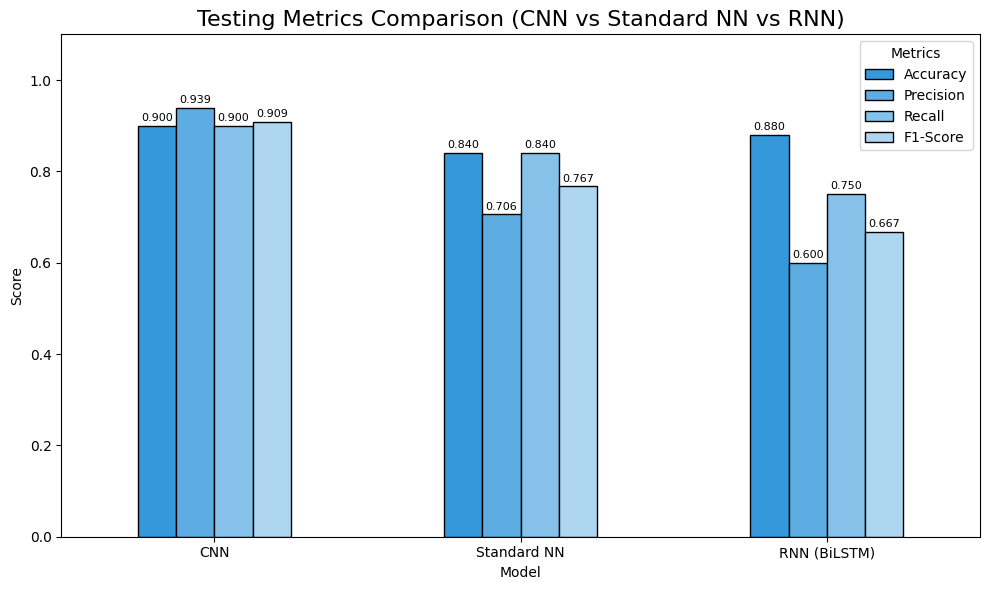

In [ ]:
# Testing results
testing_data = {
    'Model': ['CNN', 'Standard NN', 'RNN (BiLSTM)'],
    'Accuracy': [0.9000, 0.8400, 0.8800],
    'Precision': [0.9385, 0.7056, 0.6000],
    'Recall': [0.9000, 0.8400, 0.7500],
    'F1-Score': [0.9087, 0.7670, 0.6667],
}

# Create DataFrame
testing_df = pd.DataFrame(testing_data)
testing_df.set_index('Model', inplace=True)

cool_colors = ['#3498db', '#5dade2', '#85c1e9', '#aed6f1']

# Plotting
ax = testing_df.plot(
    kind='bar',
    figsize=(10,6),
    color=cool_colors,
    edgecolor='black'
)

# Title and labels
plt.title('Testing Metrics Comparison (CNN vs Standard NN vs RNN)', fontsize=16)
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(title='Metrics')
ax.grid(False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=2)

# Tight layout
plt.tight_layout()
plt.show()


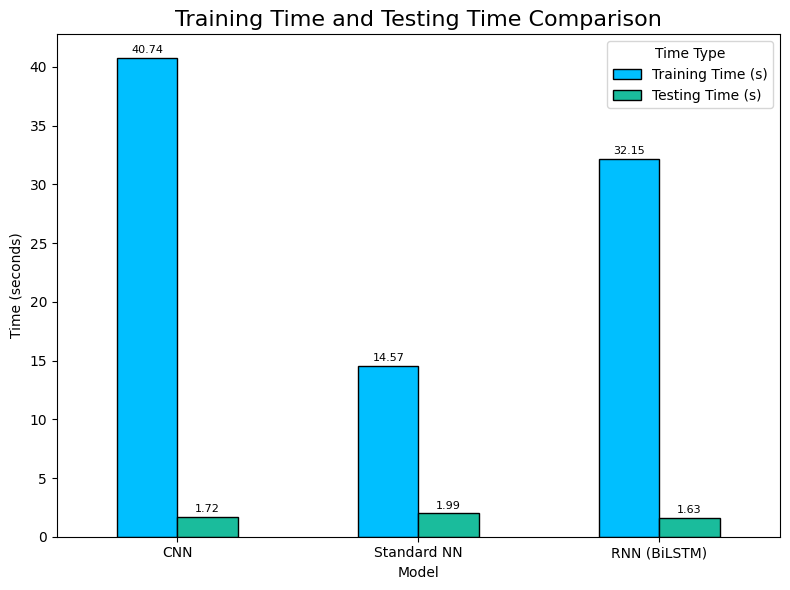

In [ ]:
# Define the time results
time_data = {
    'Model': ['CNN', 'Standard NN', 'RNN (BiLSTM)'],
    'Training Time (s)': [40.74, 14.57, 32.15],
    'Testing Time (s)': [1.72, 1.99, 1.63]
}

# Create DataFrame
time_df = pd.DataFrame(time_data)
time_df.set_index('Model', inplace=True)

# Cool color palette for time plots
time_colors = ['#00BFFF', '#1ABC9C']  # Teal and Blue shades

# Plotting
ax = time_df.plot(
    kind='bar',
    figsize=(8,6),
    color=time_colors,
    edgecolor='black'
)

# Title and labels
plt.title('Training Time and Testing Time Comparison', fontsize=16)
plt.ylabel('Time (seconds)')
plt.xticks(rotation=0)
plt.legend(title='Time Type')

# Remove gridlines
ax.grid(False)

# Write values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=2)

# Tight layout
plt.tight_layout()
plt.show()


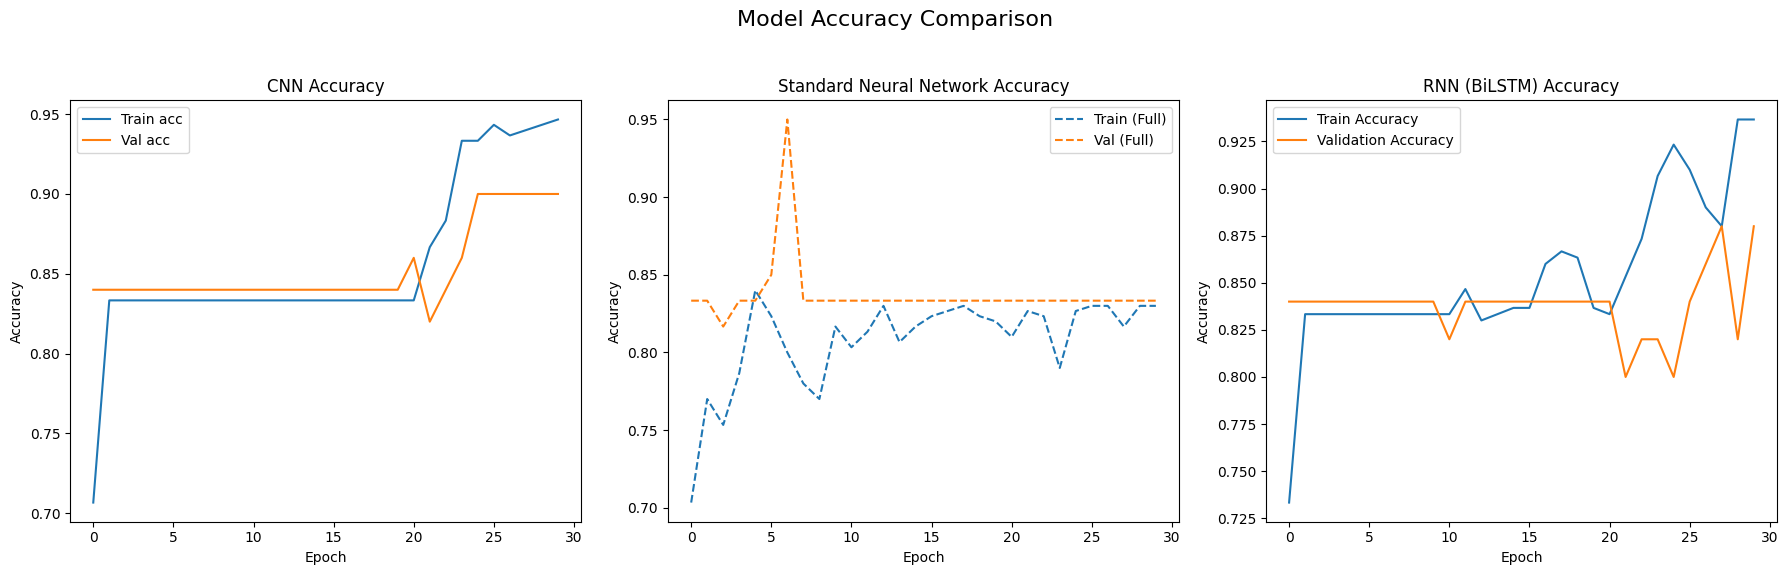

In [ ]:
# Plot Accuracy
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# CNN Accuracy
axes[0].plot(history_cnn.history['accuracy'], label='Train acc')
axes[0].plot(history_cnn.history['val_accuracy'], label='Val acc')
axes[0].set_title('CNN Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
#axes[0].grid(True)

# Standard Neural Network Accuracy
axes[1].plot(history_full.history['accuracy'], '--', label='Train (Full)')
axes[1].plot(history_full.history['val_accuracy'], '--', label='Val (Full)')
axes[1].set_title('Standard Neural Network Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
#axes[1].grid(True)

# RNN (BiLSTM) Accuracy
axes[2].plot(history.history['accuracy'], label='Train Accuracy')
axes[2].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[2].set_title('RNN (BiLSTM) Accuracy')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Accuracy')
axes[2].legend()
#axes[2].grid(True)

# Overall Title
fig.suptitle('Model Accuracy Comparison', fontsize=16)

# Layout Adjust
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


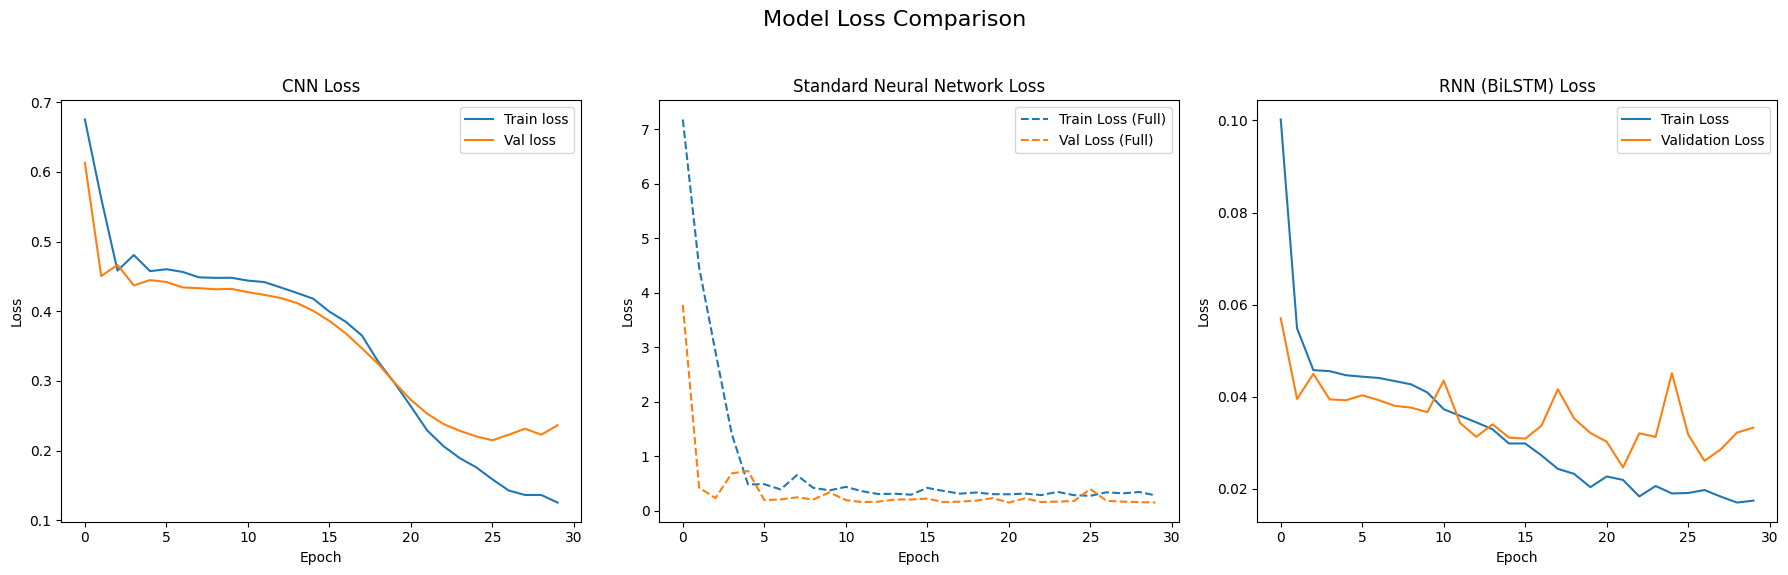

In [ ]:
# Plot Losses
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# CNN Loss
axes[0].plot(history_cnn.history['loss'], label='Train loss')
axes[0].plot(history_cnn.history['val_loss'], label='Val loss')
axes[0].set_title('CNN Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
#axes[0].grid(True)


# Standard Neural Network Loss
axes[1].plot(history_full.history['loss'], '--', label='Train Loss (Full)')
axes[1].plot(history_full.history['val_loss'], '--', label='Val Loss (Full)')
axes[1].set_title('Standard Neural Network Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
#axes[1].grid(True)

# RNN (BiLSTM) Loss
axes[2].plot(history.history['loss'], label='Train Loss')
axes[2].plot(history.history['val_loss'], label='Validation Loss')
axes[2].set_title('RNN (BiLSTM) Loss')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Loss')
axes[2].legend()
#axes[2].grid(True)

# Overall Title
fig.suptitle('Model Loss Comparison', fontsize=16)

# Layout Adjust
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
